<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Exercise_3_Fundamentals_models_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Device agnostic code:

In [35]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

###Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.

In [36]:
import sklearn
from sklearn.datasets import make_moons
n_samples=1000
X,y=make_moons(n_samples,
               noise=0.03,
               random_state=42)
print("First five samples of X:\n",X[:5])
print("First five samples of y:\n",y[:5])

First five samples of X:
 [[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]
First five samples of y:
 [1 1 1 1 0]


###Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [37]:
import pandas as pd
data=pd.DataFrame({"X1":X[:,0],
                 "X2":X[:,1],
                 "labels":y[:]}
                 )
data.head()

,X1,X2,labels
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


###Visualize Visualize Visualize....

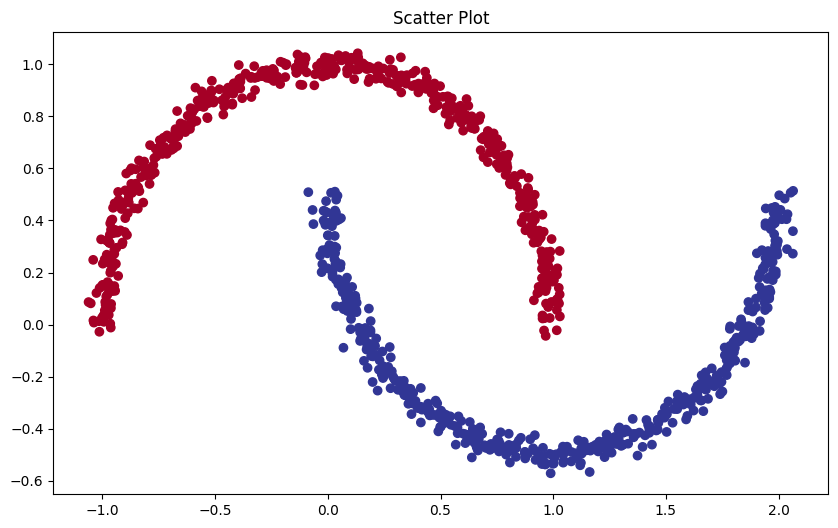

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.title("Scatter Plot")
plt.show()

In [39]:
print("Dtype before:",X.dtype,y.dtype)
print("Type before:",type(X),type(y))
X=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)
print("Dtype after:",X.dtype,y.dtype)
print("Type before:",type(X),type(y))

Dtype before: float64 int64
Type before: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Dtype after: torch.float32 torch.float32
Type before: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

800 200 800 200


In [41]:
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)

###Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.


#Relu activation function:

In [42]:
from torch import nn
class Moon_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1=nn.Linear(in_features=2,out_features=10)
    self.Layer_2=nn.Linear(in_features=10,out_features=10)
    self.Layer_3=nn.Linear(in_features=10,out_features=10)
    self.Layer_4=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.Layer_4(self.relu(self.Layer_3(self.relu(self.Layer_2(self.relu(self.Layer_1(x)))))))

model_non_linear_model=Moon_model().to(device)
model_non_linear_model

Moon_model(
  (Layer_1): Linear(in_features=2, out_features=10, bias=True)
  (Layer_2): Linear(in_features=10, out_features=10, bias=True)
  (Layer_3): Linear(in_features=10, out_features=10, bias=True)
  (Layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
#calculate the accuracy:
def accuracy(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100

  return acc


###Setup a binary classification compatible loss function and optimizer to use when training the model.

In [44]:
loss_function=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_non_linear_model.parameters(),
                          lr=0.155)

###Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
Train the model for long enough for it to reach over 96% accuracy.
The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=400
for epoch in range(epochs):
  model_non_linear_model.train()
  train_logits=model_non_linear_model(X_train).squeeze()
  train_pred=torch.round(torch.sigmoid(train_logits))
  train_loss=loss_function(train_logits,
                           Y_train)
  train_Accuracy=accuracy(y_true=Y_train,
                          y_pred=train_pred)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()


  model_non_linear_model.eval()
  with torch.inference_mode():
    test_logits=model_non_linear_model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_function(test_logits,
                            Y_test)
    test_accuracy=accuracy(y_true=Y_test,
                           y_pred=test_pred)

  if epoch%100==0:
    print(f"Epoch: {epoch},Training Loss: {train_loss:.5f},Training Accuracy:{train_Accuracy:.2f}%,Testing Loss: {test_loss:.5f},Test Accuracy: {test_accuracy:.2f}%")


Epoch: 0,Training Loss: 0.69805,Training Accuracy:50.00%,Testing Loss: 0.69658,Test Accuracy: 50.00%
Epoch: 100,Training Loss: 0.34228,Training Accuracy:84.62%,Testing Loss: 0.34878,Test Accuracy: 80.50%
Epoch: 200,Training Loss: 0.13817,Training Accuracy:94.88%,Testing Loss: 0.13069,Test Accuracy: 96.00%
Epoch: 300,Training Loss: 0.02675,Training Accuracy:100.00%,Testing Loss: 0.02347,Test Accuracy: 100.00%


###ploting Boundaries:

In [46]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


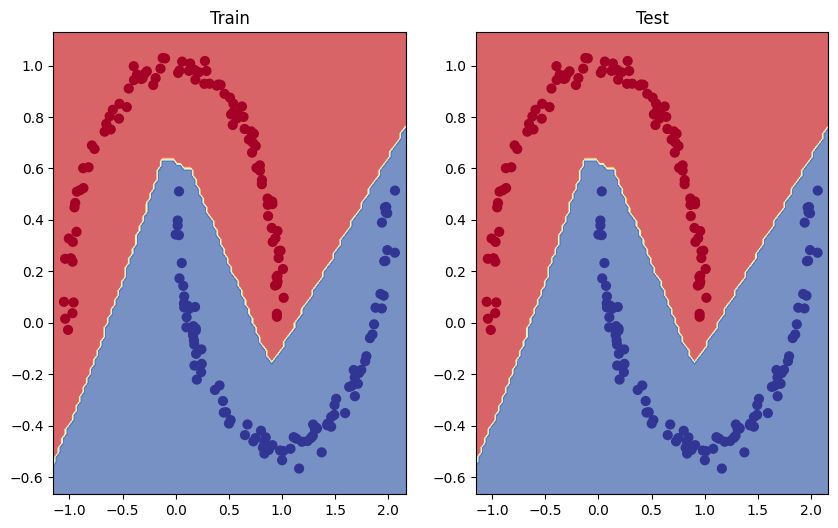

In [47]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_non_linear_model,X_test,Y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_non_linear_model,X_test,Y_test)

###Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

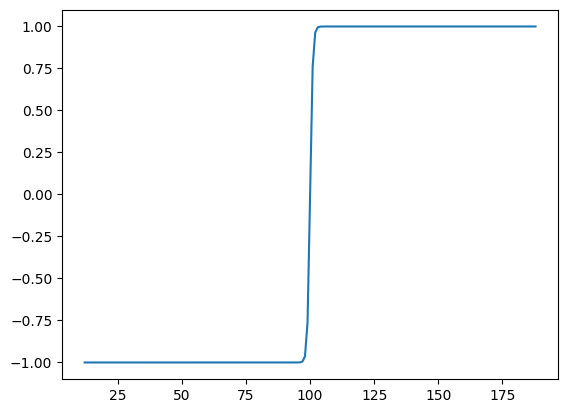

In [48]:
tensor_a=torch.arange(-100,100,1)
def tanh(x):
  return (torch.exp(x)-torch.exp(-x))/(torch.exp(x)+torch.exp(-x))
plt.plot(tanh(tensor_a))

###Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

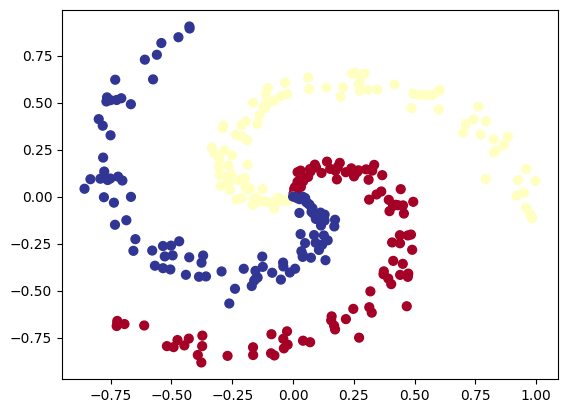

In [49]:
# Code for creating a spiral dataset from CS231n
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_s = np.zeros((N*K,D)) # data matrix (each row = single example)
y_s= np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_s[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_s[ix] = j
# lets visualize the data
plt.scatter(X_s[:, 0], X_s[:, 1], c=y_s, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [50]:
print("Dtype before:",X_s.dtype,y_s.dtype)
print("Type before:",type(X_s),type(y_s))
# Turn data into tensors
X_s= torch.from_numpy(X_s).type(torch.float) # features as float32
y_s= torch.from_numpy(y_s).type(torch.LongTensor) # labels need to be of type long
print("Dtype after:",X_s.dtype,y_s.dtype)
print("Type before:",type(X_s),type(y_s))

Dtype before: float64 uint8
Type before: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Dtype after: torch.float32 torch.int64
Type before: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [51]:
from sklearn.model_selection import train_test_split
X_train_s,X_test_s,Y_train_s,Y_test_s=train_test_split(X_s,
                                               y_s,
                                               test_size=0.2,
                                               random_state=42)
print(len(X_train_s),len(X_test_s),len(Y_train_s),len(Y_test_s))

240 60 240 60


In [52]:
X_train_s,Y_train_s=X_train_s.to(device),Y_train_s.to(device)
X_test_s,Y_test_s=X_test_s.to(device),Y_test_s.to(device)

In [53]:
data=pd.DataFrame({"X1":X_s[:,0],
                  "X2":X_s[:,1],
                  "labels":y_s[:]})
data.head()

,X1,X2,labels
0,0.000000,0.000000,0
1,0.000129,0.010100,0
2,0.004218,0.019757,0
3,0.012517,0.027597,0
4,0.004628,0.040138,0


In [54]:
torch.cuda.manual_seed(42)
class Spiral_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=20)
    self.layer2=nn.Linear(in_features=20,out_features=20)
    self.layer3=nn.Linear(in_features=20,out_features=20)
    self.layer4=nn.Linear(in_features=20,out_features=3)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

model_spiral=Spiral_model().to(device)
model_spiral

Spiral_model(
  (layer1): Linear(in_features=2, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=3, bias=True)
  (relu): ReLU()
)

In [55]:
loss_fn_s=nn.CrossEntropyLoss()
optimizer_s=torch.optim.Adam(params=model_spiral.parameters(),
                             lr=0.02)

In [56]:
torch.cuda.manual_seed(42)
epochs=3000
for epoch in range(epochs):
  model_spiral.train()
  train_logits_s=model_spiral(X_train_s).squeeze()
  train_preds_s=torch.softmax(train_logits_s,dim=1).argmax(dim=1)
  train_loss_s=loss_fn_s(train_logits_s,
                         Y_train_s)
  train_accuracy_s=accuracy(y_true=Y_train_s,
                            y_pred=train_preds_s)
  optimizer_s.zero_grad()
  train_loss_s.backward()
  optimizer_s.step()

  model_spiral.eval()
  with torch.inference_mode():
    test_logits_s=model_spiral(X_test_s).squeeze()
    test_preds_s=torch.softmax(test_logits_s,dim=1).argmax(dim=1)
    test_loss_s=loss_fn_s(test_logits_s,
                          Y_test_s)
    test_accuracy_s=accuracy(y_true=Y_test_s,
                             y_pred=test_preds_s)

  if epoch%100==0:
    print(f"Epoch: {epoch},Training Loss: {train_loss_s:.5f},Training Accuracy:{train_accuracy_s:.2f}%,Testing Loss: {test_loss_s:.5f},Test Accuracy: {test_accuracy_s:.2f}%")


Epoch: 0,Training Loss: 1.09597,Training Accuracy:35.00%,Testing Loss: 1.08363,Test Accuracy: 46.67%
Epoch: 100,Training Loss: 0.02321,Training Accuracy:99.17%,Testing Loss: 0.00153,Test Accuracy: 100.00%
Epoch: 200,Training Loss: 0.01694,Training Accuracy:99.17%,Testing Loss: 0.00021,Test Accuracy: 100.00%
Epoch: 300,Training Loss: 0.01592,Training Accuracy:99.17%,Testing Loss: 0.00011,Test Accuracy: 100.00%
Epoch: 400,Training Loss: 0.01461,Training Accuracy:99.17%,Testing Loss: 0.00012,Test Accuracy: 100.00%
Epoch: 500,Training Loss: 0.01443,Training Accuracy:99.17%,Testing Loss: 0.00010,Test Accuracy: 100.00%
Epoch: 600,Training Loss: 0.01437,Training Accuracy:99.17%,Testing Loss: 0.00010,Test Accuracy: 100.00%
Epoch: 700,Training Loss: 0.01484,Training Accuracy:99.17%,Testing Loss: 0.00011,Test Accuracy: 100.00%
Epoch: 800,Training Loss: 0.01441,Training Accuracy:99.17%,Testing Loss: 0.00008,Test Accuracy: 100.00%
Epoch: 900,Training Loss: 0.01418,Training Accuracy:99.17%,Testing 

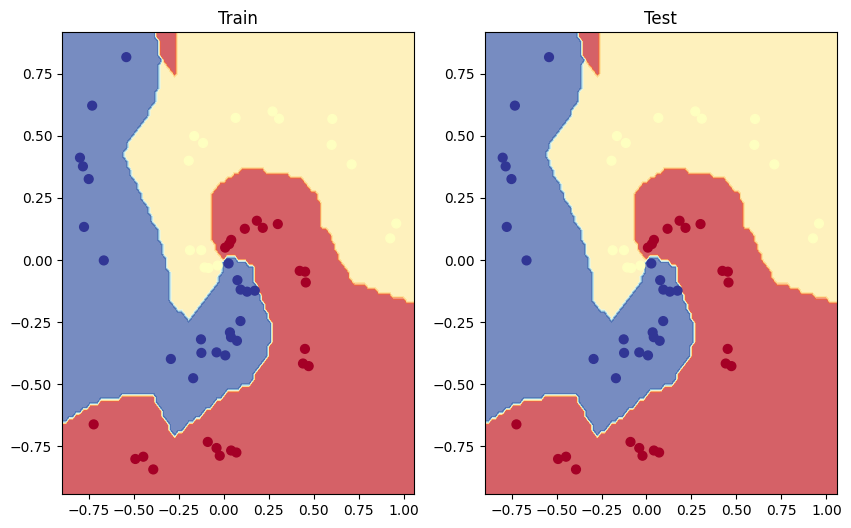

In [57]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_spiral,X_test_s,Y_test_s)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_spiral,X_test_s,Y_test_s)